# Evidencia Final - Body Performance

In [1]:
#pip install seaborn

In [2]:
#pip install statsmodels

In [3]:
#pip install sklearn

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model

In [5]:
%ls bodyPerformance.csv

bodyPerformance.csv


In [6]:
df = pd.read_csv('bodyPerformance.csv')
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [7]:
df.shape

(13393, 12)

In [8]:
df['age'].min()

21

In [9]:
df['age'].max()

64

# Introduccion
Esta es una base datos que muestra el nivel de desempeño, en algunos ejercicios, de 13,393 personas con un rango de 21 a 64 años de edad.
## Descripción de variables
* 'age' : variable númerica con un rango de edad de 21 a 64.
* 'gender' : variable categórica, tien dos categorías: F (mujer) y M (hombre). Nos dice el género de la persona.
* 'height_cm' : variable númerica que nos dice la altura en centímetros de la persona.
* 'weight_kg': variable númerica que nos dice el peso en kilogramos de la persona.
* 'body fat_%' : variable númerica que nos dice el % de grasa corporal de la persona.
* 'diastolic' : variable númerica que se refiere a la presión sanguínea, por minuto, en la arteria cuando el corazón se relaja entre latidos
* 'systolic' : variable númerica que se refiere a la presión sanguínea, por minuto, en la arteria cuando se contrae el corazón.
* 'gripForce' : variable númeica que nos muestra la fuerza de agarre de la persona.
* 'sit and bend forward_cm' : variable númerica que nos muestra cuantos centimetros se estira la persona al estar sentada.
* 'sit-ups counts' : variable númerica que nos muestra la cantidad de repeticiones en el ejercicio de abdominales que logro cada persona.
* 'broad jump_cm' : variable númerica que nos muestra la distancia en cm de la longitud de salto que logro cada persona.
* 'class' : variable categórica, tiene 4 categorías: A,B,C,D. A es que dio muy buenos resultados y D que dio malos resultados

## Pregunta de investigación 1:
### ¿Existe alguna correlación entre las variavles 'age' y 'gripForce'?
* Hipotesis: entre más jovén, mayor gripForce

In [10]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

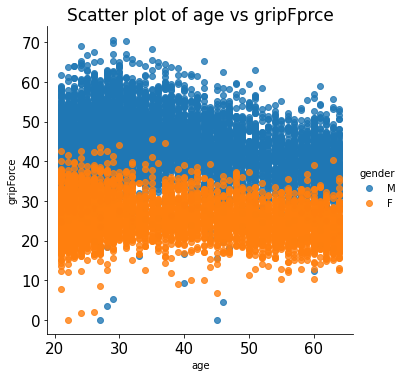

In [11]:
sns.lmplot (x = 'age', 
             y = 'gripForce',
             data = df,
            fit_reg = False,
            hue = 'gender'
            )
plt.title('Scatter plot of age vs gripFprce', fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### Conclusión: 
#### Se observa una correlación negativa debíl entre age y gripForce, es decir, que a mayor edad, menor gripForce. También se observa que, sin importar la edad, los hombres muestran un mayor gripForce en comparación a las mujeres

In [12]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

## Pregunta de investigación 2:
### ¿Qué género obtiene los mejores resultados en cuanto a 'gripForce', 'sit and bend forward_cm' y 'sit-ups counts'?
* Hipotesis: los hombres obtendran resultados superiores en 'gripForce' y 'sit-ups counts', mientras que las mujeres los superaran en 'sit and bend forward_cm'

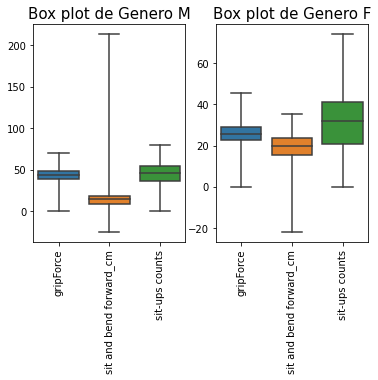

In [13]:
plt.subplot(1,2,1)

sns.boxplot(data = df.loc[df['gender'] == 'M', 
                          ['gripForce', 'sit and bend forward_cm', 'sit-ups counts']],
             whis = (0, 100)
           )

plt.title('Box plot de Genero M', fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10)

plt.show

plt.subplot(1,2,2)

sns.boxplot(data = df.loc[df['gender'] == 'F', 
                          ['gripForce', 'sit and bend forward_cm', 'sit-ups counts']],
             whis = (0, 100)
           )

plt.title('Box plot de Genero F', fontsize = 15)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10)

plt.show()

### Conclusión: 
#### Los hombre obtienen un mejor promedio en cuanto al 'gripForce' y 'sit-ups counts', mientras que las mujeres los superan en 'sit and bend forward'

In [16]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

## Pregunta de investigación 3:
### ¿Cuál es el impacto de 'height_cm' en 'broad jump_cm'?
* Hipotesis: entre más altas sean las personas, más grande sera su broad jump